# Data for visualization

In [17]:
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

In [19]:
X, y = make_classification(n_features=10)

df = pd.DataFrame(X)

In [20]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.051628,1.115881,-1.934811,-0.514002,-1.466185,-1.172392,-1.447665,1.091171,-0.213165,-1.805520
1,-0.928783,0.679066,0.880741,-0.484090,0.108820,1.656027,-0.810127,1.393729,0.457820,0.773112
2,-0.334786,0.582747,1.472895,1.959382,-1.687276,-0.178211,2.503572,1.396677,-0.181912,-0.754929
3,1.407875,0.053999,-0.837410,1.462314,-1.808951,-1.702727,0.938046,0.935743,-0.476499,-0.841505
4,-0.988097,-0.492914,1.435731,-1.500713,-0.237767,0.897443,1.038290,-1.919880,0.167009,0.378119
...,...,...,...,...,...,...,...,...,...,...
95,-1.023619,0.855910,1.489146,0.007809,-0.894055,1.291538,0.604765,0.187662,0.289174,0.175003
96,0.139626,0.063158,0.109961,1.525965,-0.068650,-0.376406,0.662196,-0.357667,-0.130302,-1.416576
97,-0.342075,2.145207,-0.693040,-0.958573,1.436127,-1.430385,0.804088,-0.476866,-0.401168,0.344302
98,1.489169,0.781008,-0.002903,-0.381725,-0.177351,0.506617,-0.667620,-0.600303,0.163101,-0.592681


# EDA

## First look

In [21]:
def info_df(df):
    plt.figure(figsize=(15, 13))
    # sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
    sb.heatmap(df.corr(), annot=True, cmap=sb.diverging_palette(220, 10, as_cmap=True))
    print('------------------------------')
    print('|    Dataset information.    |')
    print('------------------------------')
    df.info()
    print('------------------------------')
    print('|        First 10 rows.      |')
    print('------------------------------')
    print(df.head(10))
    print('---------------------------------')
    print('|        Last 10 rows.          |')
    print('---------------------------------')
    print(df.tail(10))
    print('---------------------------')
    print('| Descriptive statistics. |')
    print('---------------------------')
    print(df.describe())
    print('----------------------')
    print('| Sum of duplicates. |')
    print('----------------------')
    print(df.duplicated().sum())
    print('--------------------------')
    print('|    Covariance matrix.  |')
    print('--------------------------')
    plt.show()

------------------------------
|    Dataset information.    |
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       100 non-null    float64
 5   5       100 non-null    float64
 6   6       100 non-null    float64
 7   7       100 non-null    float64
 8   8       100 non-null    float64
 9   9       100 non-null    float64
dtypes: float64(10)
memory usage: 7.9 KB
------------------------------
|        First 10 rows.      |
------------------------------
          0         1         2         3         4         5         6  \
0  0.051628  1.115881 -1.934811 -0.514002 -1.466185 -1.172392 -1.447665   
1 -0.928783  0.679066  0.880741 -0.484090  0.108820  1.656027 -0.810127   


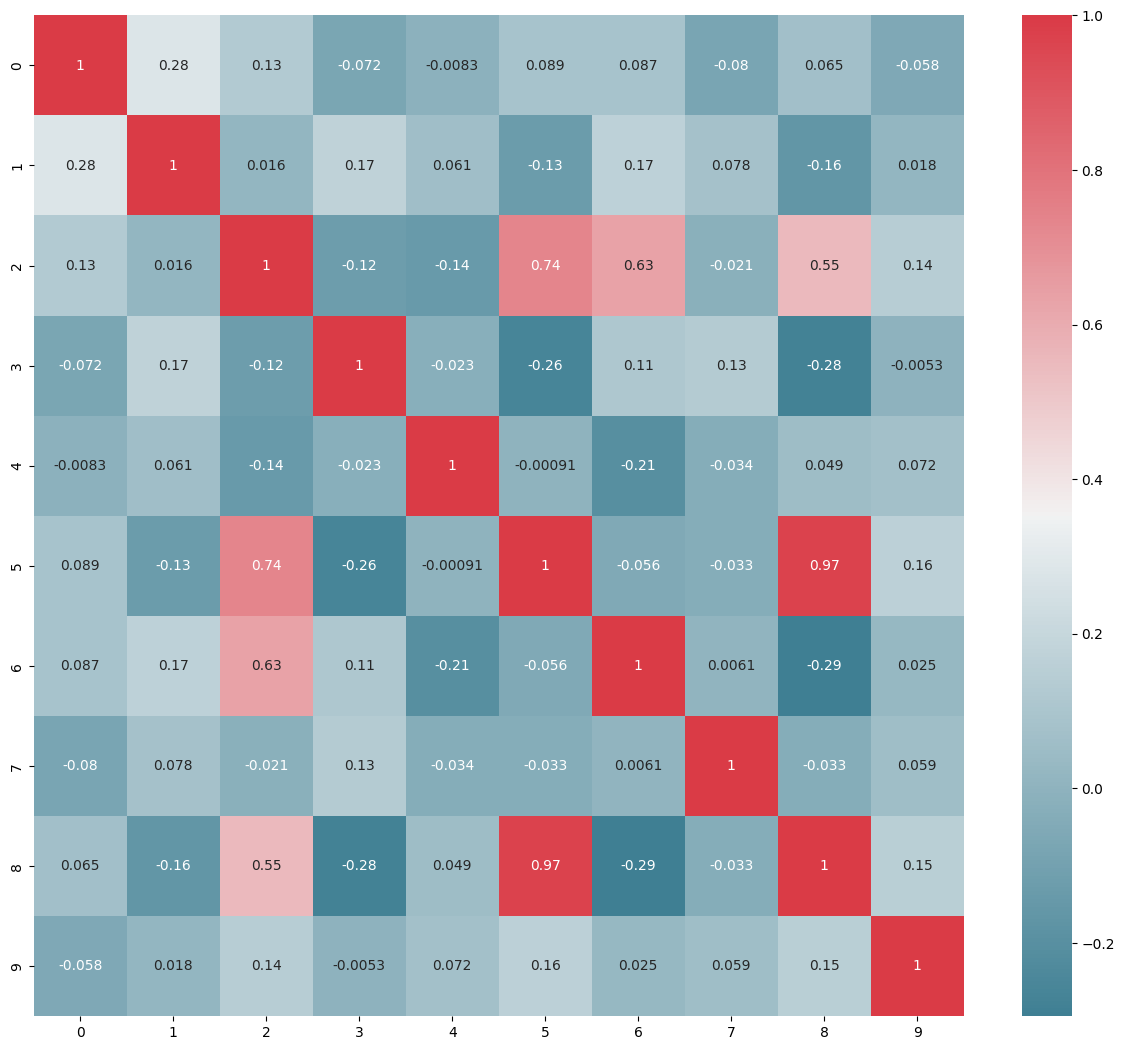

In [22]:
info_df(df)

## Proportion of missing values

In [23]:
print('---------------------------------')
print('| Proportion of missing values. |')
print('---------------------------------')
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

---------------------------------
| Proportion of missing values. |
---------------------------------


,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


## Describe

In [24]:
df.describe().T\
    .style.bar(subset=['mean'], color=px.colors.qualitative.G10[2])\
    .background_gradient(subset=['std'], cmap='Blues')\
    .background_gradient(subset=['50%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
0,100.000000,-0.049975,0.897815,-2.531445,-0.683438,0.043720,0.511700,1.919111
1,100.000000,0.027045,1.021591,-2.928962,-0.564202,0.007170,0.687165,2.574433
2,100.000000,-0.060027,1.328864,-3.522169,-0.957112,0.095068,1.066869,2.203153
3,100.000000,-0.008827,0.934219,-2.181104,-0.553725,0.001784,0.706097,1.959382
4,100.000000,-0.006005,1.088939,-2.724009,-0.728586,-0.151597,0.667818,2.833368
5,100.000000,0.004045,1.212766,-2.671437,-1.047083,0.070192,0.935182,2.626050
6,100.000000,-0.097819,1.387100,-3.400628,-1.074117,0.110609,0.933325,2.573677
7,100.000000,-0.171064,0.941374,-2.597006,-0.799578,-0.208103,0.581064,1.824776
8,100.000000,0.006379,0.316281,-0.791324,-0.206464,-0.031181,0.233087,0.732602
9,100.000000,-0.124735,1.058619,-2.762445,-0.804058,-0.151116,0.637036,2.870789


In [25]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum())/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    #sum['skew'] = df.skew().values
    return sum

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count
0,float64,0,0.000000,100,100
1,float64,0,0.000000,100,100
2,float64,0,0.000000,100,100
3,float64,0,0.000000,100,100
4,float64,0,0.000000,100,100
5,float64,0,0.000000,100,100
6,float64,0,0.000000,100,100
7,float64,0,0.000000,100,100
8,float64,0,0.000000,100,100
9,float64,0,0.000000,100,100
